In [ ]:
'''
輸入：
證券代號
期間(起訖日)

產出：
期間內K線圖


採用資料：
蠟燭線-最高價、最低價
蠟燭身-開盤價、收盤價
如開盤價<收盤價(上漲)   ==> 陽線(紅色)
如開盤價>收盤價(下跌)   ==> 陰線(綠色)

'''

In [1]:
import requests
import io
import pandas as pd
import time
import mplfinance as mpf

In [2]:
def repl(listo,ind,A,B): #phase1
    a = len(A)
    if listo[1][ind:ind+a] == A:
            listo[1] = listo[1][:ind] + B + listo[1][ind+a:]

In [8]:
def crawler( num, yy, mm): #phase2
    MM = lambda mm: '0' + str(mm) if mm < 10 else str(mm)
    page = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=csv&date='+ str(yy) + MM(mm) +'01&stockNo='+str(num)).text.splitlines()
    
    for i, text in enumerate(page): #插入換行符
         page[i] = page[i][:-2] + '"\n'
  
    for i,text in enumerate(page): #找出資料終點
         if '/' == page[i][4:5]:
            end_point = i+1
    for i, text in enumerate(page): #找出資料起點
         if '/' == page[i][4:5]:
            start_point = i
            break 
            
    for i, text in enumerate(page):  #民國年換西元年      
        if page[i][4:5] == '/':
            page[i] =  page[i][:1] + str(int(page[i][1:4])+1911) + page[i][4:]
            
    for i in range(len(page[1])): #取代標題
        repl(page,i,'日期','Date')
        repl(page,i,'開盤價','Open')
        repl(page,i,'最高價','High')
        repl(page,i,'最低價','Low')
        repl(page,i,'收盤價','Close')
        repl(page,i,'成交股數','Volume')
        
    table = ''.join(list(page[start_point-1:end_point])) #把page(list)用join組合成一個字串
    table_df = pd.read_csv(io.StringIO(table), parse_dates=['Date'],index_col=0).dropna()
    #parse_date將table_df['日期']轉換成datetime形式，index_col=0是把第一欄當作索引值

    for i in range(len(table_df['Volume'])): #把逗點去掉
        for j in range(len(table_df['Volume'][i])):
            if table_df['Volume'][i][j:j+1] == ',':
                table_df['Volume'][i] = table_df['Volume'][i][:j]  + table_df['Volume'][i][j+1:]

        table_df['Volume'][i]=int(table_df['Volume'][i])

    return table_df

data = crawler(1234,2020,2)
data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Volume,成交金額,Open,High,Low,Close,漲跌價差,成交筆數
Date,,,,,,,,
2020-02-03,59320,"1,937,991",32.80,32.80,32.40,32.75,-0.15,51
2020-02-04,38000,"1,244,147",32.75,32.80,32.65,32.80,0.05,35
2020-02-05,19100,"627,938",32.80,32.95,32.80,32.85,0.05,22
2020-02-06,27271,"903,046",33.00,33.20,33.00,33.20,0.35,30
2020-02-07,127582,"4,190,405",33.20,33.20,32.75,32.75,-0.45,100
2020-02-10,95074,"3,121,525",32.75,33.00,32.65,32.95,0.20,52
2020-02-11,82502,"2,714,581",33.30,33.30,32.80,32.90,-0.05,61
2020-02-12,101750,"3,347,519",32.90,33.00,32.80,32.90,0.00,62
2020-02-13,29250,"963,852",32.90,33.05,32.85,33.00,0.10,39


In [9]:
yy = 2020 #前時間
YY = 2020 #後時間
mm = 1
MM = 2
Y_list = []
YM_list = []

if type(yy) != int or type(YY) != int:
    print('請輸入數字！')

elif YY > yy or YY == yy :
    for i in range((YY-yy)+1):
            years = yy+i
            Y_list.append(years)
    for i in range(len(Y_list)-1):
        while mm < 13 :
            temp = Y_list[i]*100 + mm
            mm += 1
            YM_list.append(str(temp))
        mm = 1
    while mm <= MM:
        temp = Y_list[-1]*100 + mm
        mm += 1
        YM_list.append(str(temp))
                
    if YY == yy :
        if mm > MM:
            print('過去月份大於近年月份！')
            
elif YY < yy :
    print('過去年份大於近年年份！')

print(type(Y_list[0]))

print(Y_list)   
print(YM_list)

過去月份大於近年月份！
<class 'int'>
[2020]
['202001', '202002']


In [12]:
def BigCrawler( num, yy, mm, YY, MM): #phase3，小寫前時間，大寫後時間

    Y_list = []
    YM_list = []

    if type(yy) != int or type(YY) != int:
        print('請輸入數字！')

    elif YY > yy or YY == yy :
        for i in range((YY-yy)+1):
                years = yy+i
                Y_list.append(years)
        for i in range(len(Y_list)-1):
            while mm < 13 :
                temp = Y_list[i]*100 + mm
                mm += 1
                YM_list.append(str(temp))
            mm = 1
        while mm <= MM:
            temp = Y_list[-1]*100 + mm
            mm += 1
            YM_list.append(str(temp))

        if YY == yy :
            if mm > MM:
                print('過去月份大於近年月份！')

    elif YY < yy :
        print('過去年份大於近年年份！')

    print(type(Y_list[0]))

    print(Y_list)   
    print(YM_list)
    df = crawler(num,int(YM_list[0][:4]),int(YM_list[0][-2:]))
                 
    for i in range(1,len(YM_list)):
        time.sleep(5)
        df = pd.concat([df,crawler(num,int(YM_list[i][:4]),int(YM_list[i][-2:]))])

    return df

    #df.reset_index(drop=True, inplace = True)
#print(type(df.index[0])) #index為0時，2018-01-02 00:00:00
#xx = df.index.tolist()

data = BigCrawler(1234, 2020, 1, 2020, 2)
data_plot = data[['Open','High','Low','Close']]
print(data)
#crawler(num,YM_list[i][:4],YM_list[i][-2:]
#num = int(input())
#yy = int(input())  
#mm = int(input())
#YY = int(input())
#MM = int(input())


#輸出經過多少年月


過去月份大於近年月份！
<class 'int'>
[2020]
['202001', '202002']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


            Volume        成交金額   Open   High    Low  Close  漲跌價差  成交筆數
Date                                                                  
2020-01-02   96093   3,135,279  32.55  32.70  32.55  32.70  0.15    72
2020-01-03   89041   2,912,888  32.70  32.75  32.70  32.70  0.00    73
2020-01-06   66751   2,176,881  32.60  32.70  32.50  32.65 -0.05    58
2020-01-07   60241   1,968,617  32.65  32.75  32.65  32.65  0.00    38
2020-01-08   32001   1,044,782  32.65  32.70  32.60  32.60 -0.05    25
2020-01-09   66000   2,153,597  32.70  32.70  32.60  32.65  0.05    37
2020-01-10   60102   1,965,264  32.60  32.75  32.60  32.75  0.10    46
2020-01-13  377462  12,584,886  33.00  33.55  33.00  33.40  0.65   191
2020-01-14  127717   4,282,669  33.50  33.60  33.50  33.50  0.10    81
2020-01-15   62034   2,076,677  33.50  33.55  33.40  33.40 -0.10    47
2020-01-16   57100   1,910,225  33.40  33.50  33.40  33.50  0.10    46
2020-01-17   93001   3,110,633  33.50  33.50  33.40  33.45 -0.05    28
2020-0

In [ ]:
#datatime index 如何索引


'''
#下載檔案之迴圈
num = int(input('請輸入證券代碼'))
yy =int(input('請輸入起始年份'))
mm = int(input('請輸入起始月份'))
'''

In [ ]:
''''以下完成畫K線'''

In [ ]:
def moving_average(data,periods):
        return data['Close'].rolling(periods).mean() #10天的移動平均線
    
moving_average(df,10)

In [ ]:
data = df
#計算Step1
data_copy = data.copy()
data_copy['min'] = data_copy['Low'].rolling(9).min()
data_copy['max'] = data_copy['High'].rolling(9).max()
data_copy['RSV'] = data_copy['Close'] - data_copy['min']/(data_copy['max'] - data_copy['min'])
data_copy = data_copy.dropna() #濾除缺失數據,會整列濾除
data_copy
#計算K
#K的起始值訂為50



In [42]:
#計算KD值
'''
Step1: 計算RSV:(今日的收盤價 - 最近9天的最低價)/(最近9天的最高-最近9天的最低價)
#RSV說明：與最近9天相比，今天的股價是強還是弱?(看小趨勢)

Step2: 計算K值: K = 2/3 * (昨天的K值)+ 1/3 *(今日的RSV)
#K值: K 值就是 取 RSV 的加權移動平均(看中趨勢)

Step3: 計算D值: D = 2/3 * (昨天的D值)+ 1/3 *(今日的K值)
#D值:D 值則是 取 K 值的加權移動平均(看大趨勢)
'''

def KD(data):
    #計算Step1
    data_copy = data.copy()
    data_copy['min'] = data_copy['Low'].rolling(9).min()
    data_copy['max'] = data_copy['High'].rolling(9).max()
    data_copy['RSV'] = data_copy['Close'] - data_copy['min']/(data_copy['max'] - data_copy['min'])
    data_copy = data_copy.dropna() #濾除缺失數據,會整列濾除

    #計算Step2
    #K的起始值訂為50
    K_list = [50]

    for num,rsv in enumerate(list(data_copy['RSV'])):
        K_yesterday = K_list[num]
        K_today = 2/3 * K_yesterday + 1/3 * rsv
        K_list.append(K_today)
    data_copy['K'] = K_list[1:]
    D_list = [50]

    for num,K in enumerate(list(data_copy['K'])):
        D_yesterday = D_list[num]
        D_today = 2/3 * D_yesterday + 1/3 * K
        D_list.append(D_today)
    data_copy['D'] = D_list[1:]
    return data_copy

KD(data)
df.tail()

,成交股數,成交金額,Open,High,Low,Close,漲跌價差,成交筆數
Date,,,,,,,,
2017-11-23,"31,266","524,253",16.80,16.8,16.7,16.75,-0.05,23
2017-11-24,"16,094","269,378",16.75,16.8,16.7,16.80,0.05,12
2017-11-27,"45,749","770,853",16.80,16.9,16.8,16.90,0.10,25
2017-11-28,"23,001","387,417",16.90,16.9,16.8,16.85,-0.05,14
2017-11-29,"86,251","1,447,339",16.80,16.8,16.7,16.75,-0.10,25


In [27]:
from matplotlib import dates as mdates
from matplotlib import ticker as mticker
from matplotlib.dates import DateFormatter
import mplfinance as mpf
import datetime as dt
import matplotlib.pyplot as plt


In [ ]:
Ma_10 = moving_average(data,10)
Ma_50 = moving_average(data,50)
len(data)

In [ ]:

data_plot_co = data_plot.copy()
data_plot


In [ ]:
def plo_stock_price(data):
    Ma_10 = moving_average(data,10)
    Ma_50 = moving_average(data,50)
    

In [14]:
#https://openwritings.net/pg/mplfinance/python-draw-candlestickohlc-using-new-mplfinance
print(data)

            Volume        成交金額   Open   High    Low  Close  漲跌價差  成交筆數
Date                                                                  
2020-01-02   96093   3,135,279  32.55  32.70  32.55  32.70  0.15    72
2020-01-03   89041   2,912,888  32.70  32.75  32.70  32.70  0.00    73
2020-01-06   66751   2,176,881  32.60  32.70  32.50  32.65 -0.05    58
2020-01-07   60241   1,968,617  32.65  32.75  32.65  32.65  0.00    38
2020-01-08   32001   1,044,782  32.65  32.70  32.60  32.60 -0.05    25
2020-01-09   66000   2,153,597  32.70  32.70  32.60  32.65  0.05    37
2020-01-10   60102   1,965,264  32.60  32.75  32.60  32.75  0.10    46
2020-01-13  377462  12,584,886  33.00  33.55  33.00  33.40  0.65   191
2020-01-14  127717   4,282,669  33.50  33.60  33.50  33.50  0.10    81
2020-01-15   62034   2,076,677  33.50  33.55  33.40  33.40 -0.10    47
2020-01-16   57100   1,910,225  33.40  33.50  33.40  33.50  0.10    46
2020-01-17   93001   3,110,633  33.50  33.50  33.40  33.45 -0.05    28
2020-0

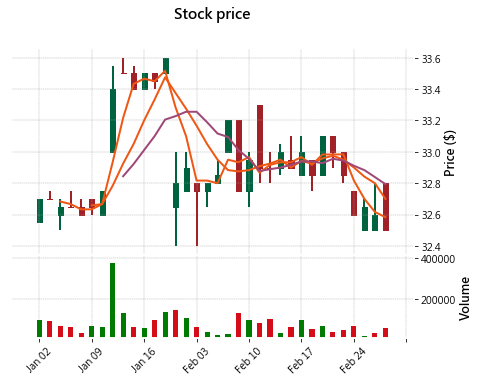

In [18]:
mpf.plot(data,type='candle',mav=(3,6,9),style = 'charles',title ='Stock price',ylabel='Price ($)',volume = True)
#,style = 'charles'

In [83]:
from mplfinance.original_flavor import candlestick_ohlc



In [40]:
print(data)

            Volume        成交金額   Open   High    Low  Close  漲跌價差  成交筆數
Date                                                                  
2020-01-02   35703     771,219  21.45  21.80  21.40  21.80  0.35    34
2020-01-03   82198   1,804,656  21.90  22.00  21.90  22.00  0.20    71
2020-01-06   30552     669,944  21.95  22.00  21.85  22.00  0.00    31
2020-01-07   27366     600,938  21.95  22.10  21.90  22.10  0.10    28
2020-01-08   30500     670,650  22.05  22.05  21.95  22.00 -0.10    23
2020-01-09  515260  11,184,420  22.00  22.00  21.80  22.00  0.00    13
2020-01-10  552000  11,995,000  21.95  22.20  21.90  22.20  0.20    38
2020-01-13  547258  11,908,879  22.50  22.50  22.35  22.40  0.20    29
2020-01-14  553200  12,045,208  22.35  22.60  22.35  22.55  0.15    32
2020-01-15   63800   1,456,637  22.55  23.10  22.55  22.80  0.25    46
2020-01-16   20242     461,175  22.70  22.85  22.70  22.85  0.05    18
2020-01-17   20375     466,887  22.85  23.10  22.85  23.10  0.25    21
2020-0

         Date     成交股數       成交金額   Open   High    Low  Close  漲跌價差  成交筆數
0  2019-12-02    8,060    102,169  12.60  12.80  12.60  12.80  0.20    12
1  2019-12-03   11,263    143,350  12.80  12.80  12.70  12.70 -0.10     9
2  2019-12-04    3,469     44,355  12.80  12.80  12.80  12.80  0.10     6
3  2019-12-05    5,111     65,308  12.80  12.80  12.80  12.80  0.00    11
4  2019-12-06    5,249     67,166  12.75  12.80  12.75  12.80  0.00    15
5  2019-12-09    1,030     13,141  12.75  12.75  12.75  12.75 -0.05     4
6  2019-12-10    5,486     70,189  12.80  12.80  12.75  12.75  0.00    14
7  2019-12-11    2,159     27,605  12.75  12.80  12.75  12.80  0.05     7
8  2019-12-12  201,003  2,598,639  12.85  13.00  12.80  12.90  0.10    49
9  2019-12-13  103,430  1,334,713  12.90  12.95  12.90  12.95  0.05    24
10 2019-12-16   23,617    305,971  12.90  13.00  12.90  13.00  0.05    17
11 2019-12-17   19,002    247,078  12.95  13.10  12.95  13.10  0.10    20
12 2019-12-18  239,561  3,260,748  13.

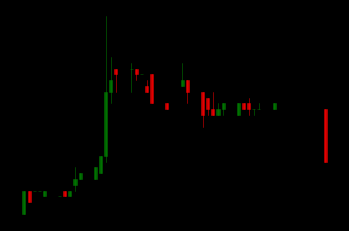

In [23]:
'''
#廢物備用1
print(data.index)
# RangeIndex(start=0, stop=5, step=1)

# convert the column (it's a string) to datetime type
datetime_series = pd.to_datetime(data['Date'])

# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

data2=df.set_index(datetime_index)

# we don't need the column anymore
data2.drop('Date',axis=1,inplace=True)

print(df2.index)
# DatetimeIndex(['2000-01-01', '1999-12-20', '2000-11-01', '1995-02-25',
#    '1992-06-30'], dtype='datetime64[ns]', freq=None)
print(data)


#廢物備用2
mpf.plot(data,type ='candle', style = 'charles',title ='Stock price', ylabel = 'Price($)', volume=True)

#廢物備用3
data = data.set_index(pd.DatetimeIndex(df['Date']))
data

#廢物備用4
#datetime 作為Index
data['Date'] =  pd.to_datetime(data['Date'], format='%d%b%Y:%H:%M:%S.%f')
data.set_index(data['Date'])
print(data)


'''
'''這是一個，唯一畫的出圖，阿但是我什麼都不懂的程式碼^ ^'''
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates

plt.style.use('ggplot')

# Extracting Data for plotting

ohlc = data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()
plt.axis('off')
fig.patch.set_facecolor('black')

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

print(data)
plt.show()
